# Efficient Frontier Portfolio Using Monte Carlo Simulation Technique


In [7]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%cd C:\Users\1\OneDrive\Desktop\Scripts
data3  = pd.read_csv('data3.csv')
data = data3.tail(252)
data = data.drop(data.columns[0], axis=1)
data.head()

C:\Users\1\OneDrive\Desktop\Scripts


,AAPL,MSFT,KO,BLK
5674,0.281660,21.113253,15.744992,26.915611
5675,0.280749,20.099542,15.678208,25.881859
5676,0.280749,19.104546,15.477856,25.685255
5677,0.286364,19.182524,14.994340,25.051051
5678,0.309128,19.379028,14.775288,26.243355


In [9]:
cov_max = (np.log(data/data.shift())).cov()

The expected portfolio's return is 0.48 with expected standard deviation equals to 0.558.
The calculated sharp ratio is 0.861
The optimal weight of AAPL is 43 %
The optimal weight of MSFT is 51 %
The optimal weight of KO is 5 %
The optimal weight of BLK is 0 %


Text(0, 0.5, 'Expected Return')

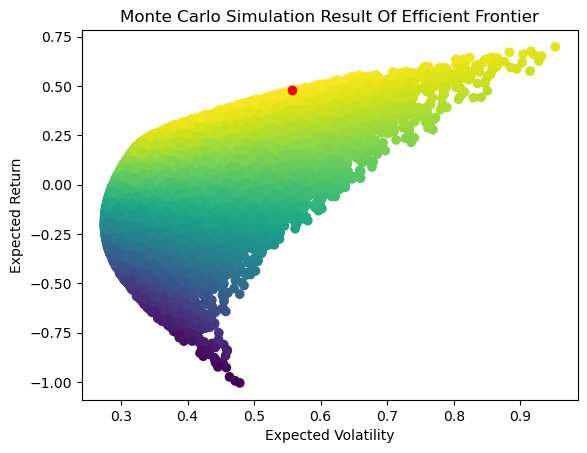

In [10]:
n =50000
weights = np.zeros((n,4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(np.log(data/data.shift()).mean() * weight) * 252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(cov_max, weight))) * np.sqrt(252)
    sharpe_ratios[i] =  exp_rtns[i]/exp_vols[i]
      

print(f"The expected portfolio's return is {round(exp_rtns[sharpe_ratios.argmax()], 3)}"
      f" with expected standard deviation equals to {round(exp_vols[sharpe_ratios.argmax()], 3)}.")
print(f"The calculated sharp ratio is {round(sharpe_ratios.max(),3)}")

i = 0
for ticker in data.columns.to_list():
    print(f"The optimal weight of {ticker} is {round(weights[sharpe_ratios.argmax(),i]*100)} %")
    i+= 1


#Visualisation 
fig, ax = plt.subplots()
ax.scatter(exp_vols,exp_rtns,c =sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()],exp_rtns[sharpe_ratios.argmax()], c ='red')
ax.set_title('Monte Carlo Simulation Result Of Efficient Frontier')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')